## AMATH 585 Homework 4: 
Shannon Dow 

## Problem 1: 
Here, I adapted code from the Notebook to output the Max Norm error, so that I could use it to produce the plots shown.

In [1]:
%matplotlib inline

In [2]:
from pylab import *

In [3]:
def T(n,x):
    """
    Evaluate Chebyshev polynomial T_n(x) using 3-term recurrence relation.
    Assumes x is a numpy array of values.
    Does not work as written if x is just a single value!
    """
    # Initialize Tnm = 1 and Tn = x and then iterate
    Tnm = ones(x.shape)  # will be used for T_{n-1} in loop
    if n==0:
        return Tnm       # special case T_0 = 1 forall x
    Tn = x               # will be used for T_n in loop
    
    for k in range(2,n+1):
        Tnp = 2*x*Tn - Tnm
        Tnm = Tn.copy()
        Tn = Tnp.copy()
    return Tn

In [4]:
def T_sum(c,x):
    N = len(c) - 1
    B = empty((len(x),N+1))
    for k in range(N+1):
        B[:,k] = T(k,x)
    Tsum = dot(B,c)
    return Tsum

In [5]:
def poly_interp_chebyshev(u_fcn, x):
    
    # Vandermonde matrix using monomial basis:
    N = len(x) - 1
    B = empty((N+1,N+1), dtype=float)  # initialize storage for B
    for k in range(N+1):
        B[:,k] = T(k,x)
   
    # Solve for polynomial coefficients:
    u = u_fcn(x)
    c = solve(B,u)
    return c

def poly_plot_chebyshev(u_fcn, x, c):
    
    xfine = linspace(-1,1,1000)
    ufine = u_fcn(xfine)

    # Evaluate p(xfine) using T_sum:
    p = T_sum(c,xfine)

    err = abs(p-ufine).max()
    return err
       

Problem 1a: 
Here, the plots are reproduced for the runge fuction shown below.
$u(x) = \frac{1}{1+16x^2} $

In [6]:
u_fcn = lambda x: 1 / (1 + 16*x**2)

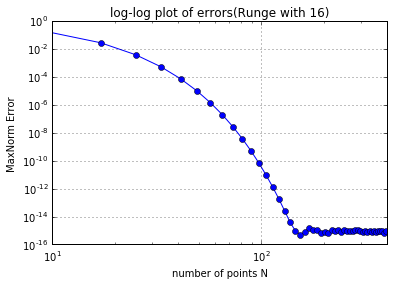

In [7]:
error = []
nvals = []
for n in range(1,400,8):    
    N = n;
    x = cos(linspace(0, pi,n+1))
    c = poly_interp_chebyshev(u_fcn, x)
    er = poly_plot_chebyshev(u_fcn,x,c)
    error.append(er)
    nvals.append(n)

loglog(nvals,error,'bo-') 
xlim(10,400)
grid(True)
title('log-log plot of errors(Runge with 16)')
xlabel('number of points N')
ylabel('MaxNorm Error')
    

In order to reproduce the plot shown in the homework, I needed to yse an even step of N. When I used an odd number, the plot becomes less smooth. 

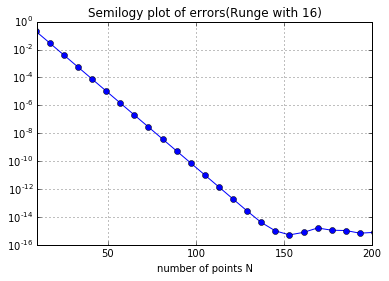

In [8]:
semilogy(nvals,error,'bo-')
xlim(10,200)
title('Semilogy plot of errors(Runge with 16)')
xlabel('number of points N')
grid(True)

As mentioned in the homework, you can see the linear decay rate.

Problem 1b: Here I will reproduce the plots above for this variant of the Runge function shown below It has poles that are closr to the real axis, slowing convergence. $u(x) = \frac{1}{1+25x^2}$

In [9]:
u_fcnv = lambda x: 1 / (1 + 25*x**2)

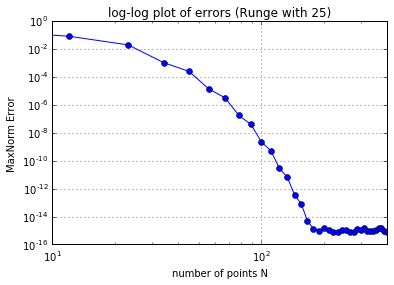

In [10]:
errorv = []
nvalsv = []
for n in range(1,400,11):    
    N = n;
    x = cos(linspace(0, pi,n+1))
    c = poly_interp_chebyshev(u_fcnv, x)
    er = poly_plot_chebyshev(u_fcnv,x,c)
    errorv.append(er)
    nvalsv.append(n)

loglog(nvalsv,errorv,'bo-') 
xlim(10,400)
grid(True)
title('log-log plot of errors (Runge with 25)')
xlabel('number of points N')
ylabel('MaxNorm Error')

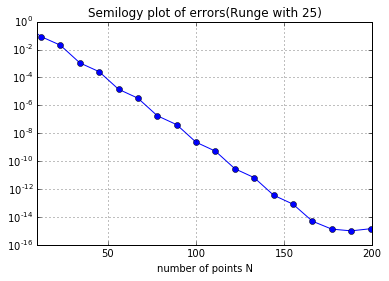

In [11]:

semilogy(nvalsv,errorv,'bo-')
xlim(10,200)
title('Semilogy plot of errors(Runge with 25)')
xlabel('number of points N')
grid(True)

For these plots, i have them with an odd value of n. This makes the plots more jagged. Additionally, you can see the difference in the convergence rate. For this function, the convergence is slightly slower. You can see in the semilogy plot that it takes longer (N = 175) to converge vs the (N = 150) in the previous case. This is due to the poles being located closer to the real axis. 

Problem 1c) Here I will reproduce similar plots, but with the analytic function on the complex plane. $ u(x) = (x-\frac{1}{2})\sin(10x) $

In [12]:
u_fcna = lambda x: (x-0.5)*sin(10*x)

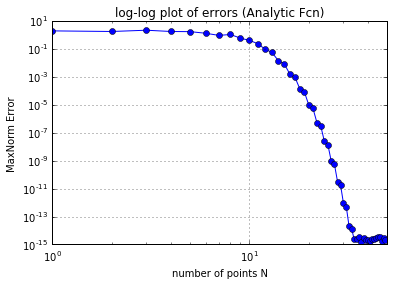

In [13]:
errora = []
nvalsa = []
for n in range(1,50):    
    N = n;
    x = cos(linspace(0, pi,n+1))
    c = poly_interp_chebyshev(u_fcna, x)
    er = poly_plot_chebyshev(u_fcna,x,c)
    errora.append(er)
    nvalsa.append(n)

loglog(nvalsa,errora,'bo-') 
xlim(1,50)
grid(True)
title('log-log plot of errors (Analytic Fcn)')
xlabel('number of points N')
ylabel('MaxNorm Error')

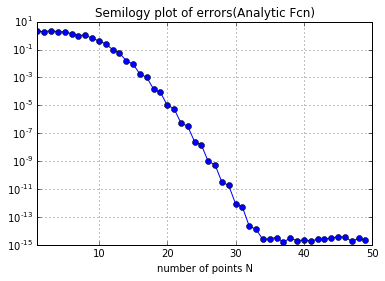

In [14]:
semilogy(nvalsa,errora,'bo-')
xlim(1,50)
title('Semilogy plot of errors(Analytic Fcn)')
xlabel('number of points N')
grid(True)

Unlike the Runge function, which had practically linear semilogy plots, the error decreases at an increasing rate. It takes less than N = 40 points to converge to $10^{15}$ error. Again, using an odd number provides more jagged plots. 

### Problem 2: 
Below is a code to find the T''n(x) or the second derivative of each Chebyshev basis function. From the code above, the recursive formula for the first derivative of the T(n+1) is: 
$$ T_x(n+1) = 2xT_x(n) - T(n-1) $$
And the second derivative is: 
$$ T_{xx}(n+1) = 2xT_{xx}(n) + 4T_x(n) - T_{xx}(n-1) $$
Additionally, for the special cases of n = 0 and n= 1, you must set up the initial values. $T_{xx}(0) = 0$ and $T_{xx}(1) = 0$

In [15]:
def Txx(n,x):
    """
    Evaluate second derivative of Chebyshev polynomial T_n(x) using 3-term recurrence relation
    Assumes x is a numpy array of points.
    """
    Tnm = ones(x.shape)  # T_{n-1} 
    Txnm = zeros(x.shape) # T_x{n-1}
    Txxnm = zeros(x.shape) # T_xx{n-1}
    if n==0:
        return Txxnm        
    Tn = x               # T_{n}
    Txn = ones(x.shape)  # T_x{n}
    Txxn = zeros(x.shape) #T_xx{n}
    for k in range(2,n+1):
        Tnp = 2*x*Tn - Tnm # T_{n+1} = (2x)T_{n} - T_{n-1}
        Txnp = 2*Tn + 2*x*Txn - Txnm # T_x{n+1} = (2)T_{n}+(2x)T_x{n}-T_x{n-1}
        Txxnp = 2*x*Txxn + 4*Txn - Txxnm # T_xx{n+1} = (2x)T_xx{n}+(4)T_x{n}-T_xx{n-1}
        Tnm = Tn.copy() # T_{n-1} = T_{n}
        Tn = Tnp.copy() # T_{n} = T_{n+1}
        Txnm = Txn.copy() # T_x{n-1} = T_x{n}
        Txn = Txnp.copy() # T_x{n} = T_x{n+1}
        Txxnm = Txxn.copy() # T_xx{n-1} = T_xx{n}
        Txxn = Txxnp.copy() # T_xx{n} = T_xx{n+1}
    return Txxn

This section of code tests that the above Txx function is working properly for the three functions: 
$$ u(x) = sin(2x) $$
$$ u(x) = (x-\frac{1}{2})\sin(10x) $$
$$u(x) = \frac{1}{1+16x^2} $$
As you can see from the graphs below, when n is high enough, this is an excellent approximation to the second derivative. 

In [16]:
xfine = linspace(-1,1,1000)

u_fcn = lambda x: sin(2*x)
ux_fcn = lambda x: 2*cos(2*x)
uxx_fcn = lambda x: -4*sin(2*x)

u_fcn2 = lambda x: (x-0.5)*sin(10*x)
uxx_fcn2 = lambda x: (50-100*x)*sin(10*x)+20*cos(10*x)

u_fcn3 = lambda x: 1 / (1 + 16*x**2)
uxx_fcn3 = lambda x: (-32*(1-48*x**2))/((1+16*x**2)**3)

Max absolute error in derivative = 8.89955e-13
Max absolute error in derivative = 0.0118507
Max absolute error in derivative = 27.8835
Max absolute error in derivative = 2.3439e-12
Max absolute error in derivative = 0.0047233
Max absolute error in derivative = 6.18588
Max absolute error in derivative = 8.54339e-12
Max absolute error in derivative = 0.000713062
Max absolute error in derivative = 22.0836


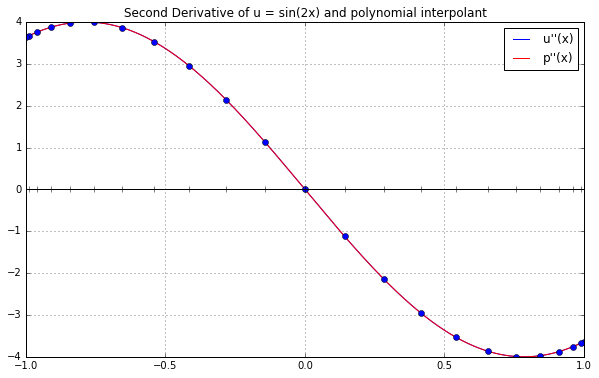

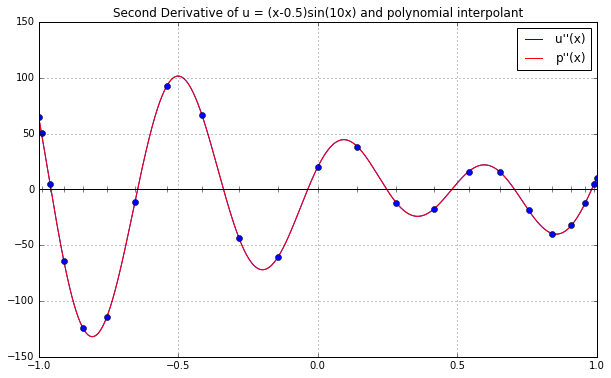

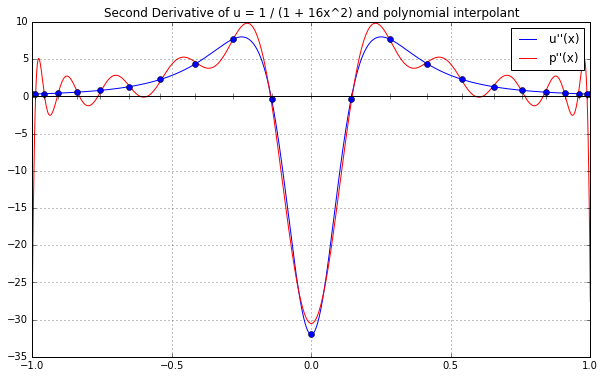

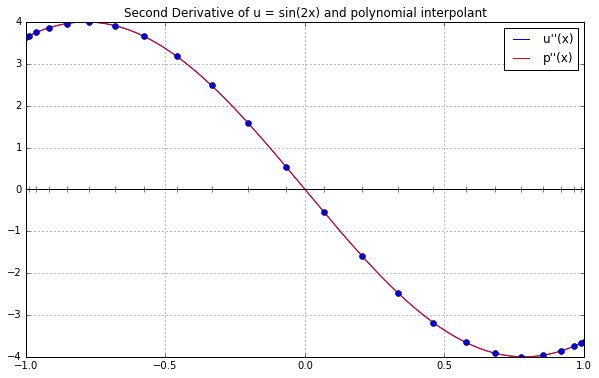

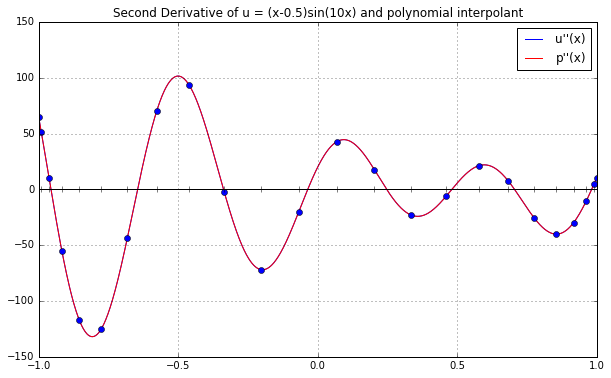

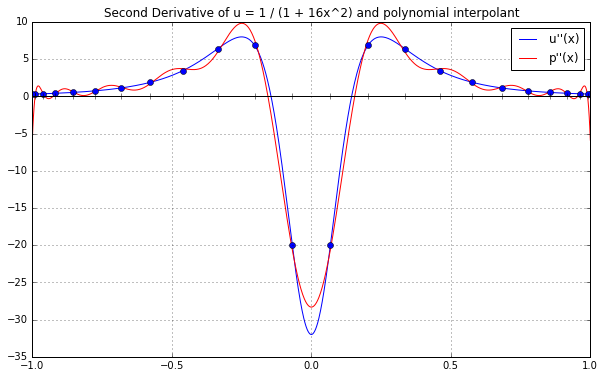

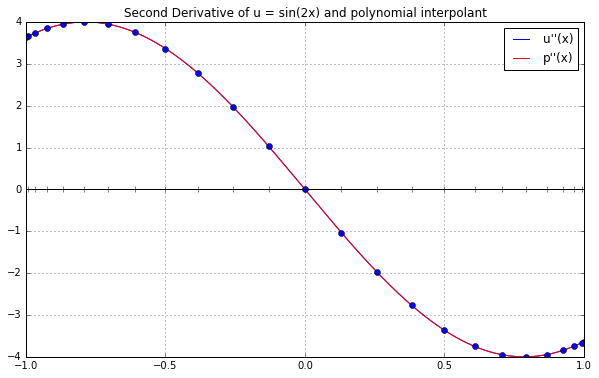

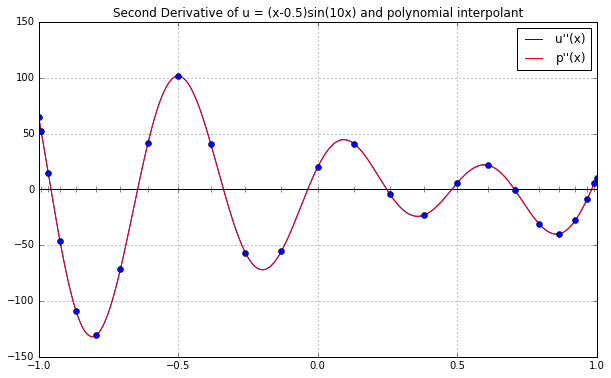

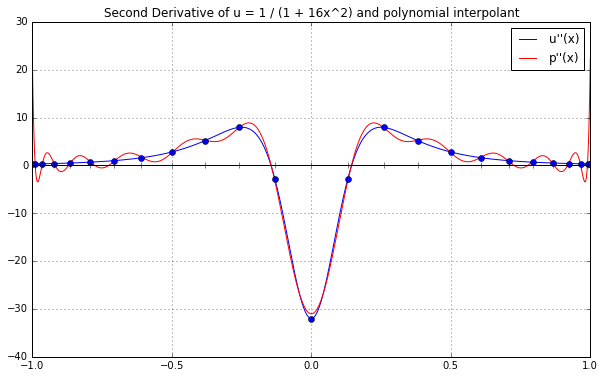

In [17]:
n = [22,23,24]
for N in n:
    #Set up chebyshev points:
    x = cos(linspace(0, pi, N+1))
    #Set up the C values for each of the three functions
    c = poly_interp_chebyshev(u_fcn, x)
    c2 = poly_interp_chebyshev(u_fcn2, x)
    c3 = poly_interp_chebyshev(u_fcn3, x)
    B = empty((len(xfine),N+1))

    # evaluate sum c_n * Txx_n(x) at xfine points:

    for k in range(N+1):
        B[:,k] = Txx(k,xfine)
    pfine = dot(B,c)
    pfine2= dot(B,c2)
    pfine3 = dot(B,c3)

    # true u''(x) at xfine points:
    uxx_fine = uxx_fcn(xfine)
    uxx2_fine = uxx_fcn2(xfine)
    uxx3_fine = uxx_fcn3(xfine)

    
    figure(figsize=(10,6))
    plot(xfine, uxx_fine, 'b', label="u''(x)")
    plot(xfine, pfine, 'r', label="p''(x)")
    plot(x, uxx_fcn(x), 'bo')
    plot(x, zeros(x.shape), 'k-+')
    grid(True)
    legend()
    title('Second Derivative of u = sin(2x) and polynomial interpolant')
    print('Max absolute error in derivative = %g' % abs(pfine-uxx_fine).max());


    figure(figsize=(10,6))
    plot(xfine, uxx2_fine, 'b', label="u''(x)")
    plot(xfine, pfine2, 'r', label="p''(x)")
    plot(x, uxx_fcn2(x), 'bo')
    plot(x, zeros(x.shape), 'k-+')
    grid(True)
    legend()
    title('Second Derivative of u = (x-0.5)sin(10x) and polynomial interpolant')
    print('Max absolute error in derivative = %g' % abs(pfine2-uxx2_fine).max());

    figure(figsize=(10,6))
    plot(xfine, uxx3_fine, 'b', label="u''(x)")
    plot(xfine, pfine3, 'r', label="p''(x)")
    plot(x, uxx_fcn3(x), 'bo')
    plot(x, zeros(x.shape), 'k-+')
    grid(True)
    legend()
    title('Second Derivative of u = 1 / (1 + 16x^2) and polynomial interpolant')
    print('Max absolute error in derivative = %g' % abs(pfine3-uxx3_fine).max());


Above are three plots of all three functions with N = 22,23 and 24. There is a more significant increase in accuracy between 22 and 23 than between 23 and 24 which will be demonstrated later in the error plots. Additionally, after a certain point for the first two functions, the approximation becomes really good. This is not true for the last function (The Runge fcn).

In [18]:
def TxxError (N, u_fcn,uxx_fcn):
    """
    This finds the error between the true u'' and the interpolant for a specific function and error.
    """
    x = cos(linspace(0, pi, N+1))
    c = poly_interp_chebyshev(u_fcn, x)
    B = empty((len(xfine),N+1))
    
    for k in range(N+1):
        B[:,k] = Txx(k,xfine)
    pfine = dot(B,c)

    # true u''(x) at xfine points:
    uxx_fine = uxx_fcn(xfine)
    
    error = abs(pfine-uxx_fine).max()
    return error

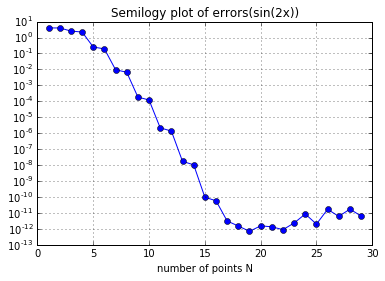

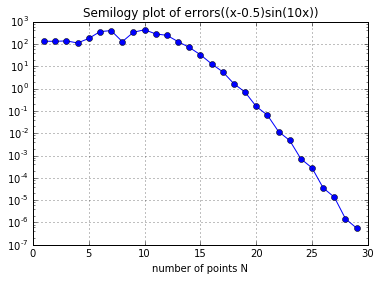

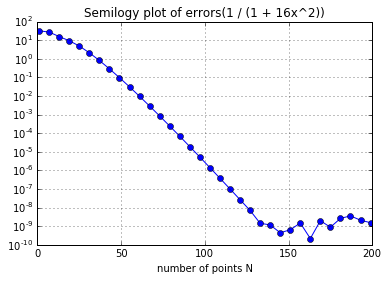

In [19]:
uxx1error = []
uxx2error= []
uxx3error= []
uxxn1vals = []
uxxn2vals = []
uxxn3vals = []
for n in range(1,30):
    uxx1error.append(TxxError(n,u_fcn,uxx_fcn))
    uxxn1vals.append(n)
    uxx2error.append(TxxError(n,u_fcn2,uxx_fcn2))
    uxxn2vals.append(n)
for n in range(1,200,6):
    uxx3error.append(TxxError(n,u_fcn3,uxx_fcn3))
    uxxn3vals.append(n)

figure(1)

semilogy(uxxn1vals,uxx1error,'bo-')
title('Semilogy plot of errors(sin(2x))')
xlabel('number of points N')
grid(True)

figure(2)

semilogy(uxxn2vals,uxx2error,'bo-')
title('Semilogy plot of errors((x-0.5)sin(10x))')
xlabel('number of points N')
grid(True)

figure(3)

semilogy(uxxn3vals,uxx3error,'bo-')
title('Semilogy plot of errors(1 / (1 + 16x^2))')
xlabel('number of points N')
grid(True)


From these plots, it can be observed that there is a cutoff on the accuracy that can be achieved. Once you hit a certain size of N, the error increases and then semi-plateaus after that. The first two functions that have sines, which are analytic through the complex plane and generally smooth converge much faster than the runge function. It takes less N to get the same amount of accuracy (approximately $10^{-12}$). 

As previously seen in the above plots, when N switches between even and odd, it becomes jagged. The jump between odd to even is smaller than the jump from even to odd. Contrarily, the error plot is very smooth when you only use either all odd or all even values of n, demonstrated in the last plot of the error of the runge function. The difference is likely due to the different placement for Chebyshev points for even and odd values of N. 

## Problem 3: 
I will create a function to solve a BVP with dirichlet boundary conditions using spectral collocation of the Chebyshev Points. 

In [60]:
def Solve_BVP_Chev_Spec(u_fcn,ffcn,N,ainfo,binfo):
    """
    Solves a BVP of the form u''(x)=f(x) using spectral collocation of the Chebyshev points. 
    ainfo: u(a) = alpha
    binfo: u(b) = beta
    u_fcn: u
    f: the f(x)
    m: number of points
    
    We will solve the linear system Ac = f, where: 
    A = a matrix such that A_jn = T''_n(xj) and then solve for c
    Returns: 
    c
    """
    a,alpha = ainfo
    b,beta = binfo
    
    #Get the x values, or the Chebyshev points: 
    x = cos(linspace(0, pi, N+1)) 
    #Construct the f (using Dirichlet BC)
    f = ffcn(x)
    f[0] = beta
    f[N] = alpha
    
    #Construct the A matrix
    A = zeros((N+1,N+1))
    for i in range(0,N+1):
        for j in range(0,N+1):
            A[i,j] = Txx(j,array([x[i]]))
    for j in range(0,N+1):
        A[0,j] = T(j,array(x[0]))
        A[N,j] = T(j,array(x[N]))      
    c = solve(A,f)
    return c

The next section solves the BVP $u''(x) = f(x) $ with Dirichlet boundary data: $u(-1) = \alpha $ and $u(1) = \beta$ using the function defined above. 

In [61]:
u_fcn = lambda x: sin(2*x)  
ffcn = lambda x: -4*sin(2*x)
a = -1; alpha = sin(-2); ainfo = (a, alpha)
b = 1; beta = sin(2);   binfo = (b, beta)
N = 3
c = Solve_BVP_Chev_Spec(u_fcn,ffcn,N,ainfo,binfo)
print(c)

[ -2.22044605e-16   1.18978776e+00   2.07154731e-16  -2.80490328e-01]


Now, make a semilogy plot of the error

In [62]:
def ErrorBVP (N,c,u_fcn):
    """
    This finds the error between the true u'' and the BVP solution
    """
    x = cos(linspace(0, pi, N+1))
    u_approx = T_sum(c,x)
    
    u_true = u_fcn(x)
    
    error = abs(u_approx-u_true).max()
    return error

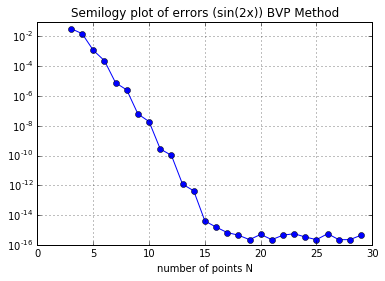

In [66]:
nvalues = []
errorBVP = []
for n in range(3,30):
    c = Solve_BVP_Chev_Spec(u_fcn,ffcn,n,ainfo,binfo)
    errorBVP.append(ErrorBVP(n,c,u_fcn))
    nvalues.append(n)
semilogy(nvalues,errorBVP,'bo-')
title('Semilogy plot of errors (sin(2x)) BVP Method')
xlabel('number of points N')
grid(True)
